# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


In [11]:
import warnings
warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'../min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)
print(time()-start)

11.929682493209839


In [12]:
#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()
dv1H.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [13]:
# 进场信号
long = dv1H.add_formula("long","If((Ts_Mean(close,20)>Ts_Mean(close,55)) && (Delay(Ts_Mean(close,20),1)<=Delay(Ts_Mean(close,55),1)),2,0)", add_data=True)
short = dv1H.add_formula("short","If((Ts_Mean(close,20)<Ts_Mean(close,55)) && (Delay(Ts_Mean(close,20),1)>=Delay(Ts_Mean(close,55),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLong","If(short==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShort","If(long==2,-1,0)", add_data=True)

In [15]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdMa = TimingDigger(output_folder=".", output_format='pdf',signal_name='Ma')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [16]:
TimingSignal(tdMa, dv1H, mhp=100, sl=0.05, sp=0.3)#调取数据

Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%


In [17]:
tdMa.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.721 -10.688  -0.320
p-value              0.001   0.000   0.750
mean                 0.059  -0.035  -0.003
std                  0.069   0.020   0.063
info_ratio           0.854  -1.757  -0.042
skewness             1.384   0.022   2.027
kurtosis             0.571  -1.365   4.332
pct5                 0.001  -0.064  -0.058
pct25                0.010  -0.054  -0.047
pct50                0.037  -0.034  -0.018
pct75                0.067  -0.019   0.010
pct95                0.218  -0.005   0.126
occurance           20.000  38.000  58.000
win_ratio              NaN     NaN   0.345
win_mean/loss_mean     NaN     NaN   1.681


In [18]:
tdMa.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.868  -8.404   0.507
p-value              0.000   0.000   0.614
mean                 0.071  -0.036   0.004
std                  0.056   0.025   0.065
info_ratio           1.280  -1.401   0.067
skewness             1.276  -0.353   1.220
kurtosis             1.331  -1.234   1.624
pct5                 0.015  -0.073  -0.071
pct25                0.025  -0.058  -0.048
pct50                0.062  -0.027  -0.012
pct75                0.090  -0.013   0.031
pct95                0.175  -0.004   0.116
occurance           22.000  37.000  59.000
win_ratio              NaN     NaN   0.373
win_mean/loss_mean     NaN     NaN   2.008


In [19]:
tdMa.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               6.679 -13.326    0.146
p-value              0.000   0.000    0.884
mean                 0.066  -0.035    0.001
std                  0.063   0.023    0.064
info_ratio           1.043  -1.549    0.014
skewness             1.285  -0.239    1.596
kurtosis             0.782  -1.166    2.785
pct5                 0.004  -0.071   -0.065
pct25                0.017  -0.056   -0.048
pct50                0.048  -0.031   -0.014
pct75                0.088  -0.015    0.022
pct95                0.216  -0.005    0.121
occurance           42.000  75.000  117.000
win_ratio              NaN     NaN    0.359
win_mean/loss_mean     NaN     NaN    1.854


In [20]:
dv1H.add_formula('alpha1_C','Ts_Argmax(SignedPower(If(Return(close,1)<0, StdDev(Return(close,1),20),close),2),5)',add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180101000000,NaN
20180101010000,NaN
20180101020000,NaN
20180101030000,NaN
20180101040000,NaN
20180101050000,NaN
20180101060000,NaN
20180101070000,NaN
20180101080000,NaN


In [145]:
# 进场信号
long = dv1H.add_formula("long","If(alpha1_C>0.8,2,0)", add_data=True)
short = dv1H.add_formula("short","If(alpha1_C<=0.3,-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLong","If(short==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShort","If(long==2,-1,0)", add_data=True)

Field [long] is overwritten.
Field [short] is overwritten.
Field [closeLong] is overwritten.
Field [closeShort] is overwritten.


In [146]:
tdMa.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.721 -10.688  -0.320
p-value              0.001   0.000   0.750
mean                 0.059  -0.035  -0.003
std                  0.069   0.020   0.063
info_ratio           0.854  -1.757  -0.042
skewness             1.384   0.022   2.027
kurtosis             0.571  -1.365   4.332
pct5                 0.001  -0.064  -0.058
pct25                0.010  -0.054  -0.047
pct50                0.037  -0.034  -0.018
pct75                0.067  -0.019   0.010
pct95                0.218  -0.005   0.126
occurance           20.000  38.000  58.000
win_ratio              NaN     NaN   0.345
win_mean/loss_mean     NaN     NaN   1.681


In [147]:
tdMa.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.868  -8.404   0.507
p-value              0.000   0.000   0.614
mean                 0.071  -0.036   0.004
std                  0.056   0.025   0.065
info_ratio           1.280  -1.401   0.067
skewness             1.276  -0.353   1.220
kurtosis             1.331  -1.234   1.624
pct5                 0.015  -0.073  -0.071
pct25                0.025  -0.058  -0.048
pct50                0.062  -0.027  -0.012
pct75                0.090  -0.013   0.031
pct95                0.175  -0.004   0.116
occurance           22.000  37.000  59.000
win_ratio              NaN     NaN   0.373
win_mean/loss_mean     NaN     NaN   2.008


In [148]:
tdMa.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               6.679 -13.326    0.146
p-value              0.000   0.000    0.884
mean                 0.066  -0.035    0.001
std                  0.063   0.023    0.064
info_ratio           1.043  -1.549    0.014
skewness             1.285  -0.239    1.596
kurtosis             0.782  -1.166    2.785
pct5                 0.004  -0.071   -0.065
pct25                0.017  -0.056   -0.048
pct50                0.048  -0.031   -0.014
pct75                0.088  -0.015    0.022
pct95                0.216  -0.005    0.121
occurance           42.000  75.000  117.000
win_ratio              NaN     NaN    0.359
win_mean/loss_mean     NaN     NaN    1.854


In [149]:
import matplotlib.pyplot as plt

def Plot_Mean(dv, alpha, chart_name='dv_alpha_ma', ShortPeriod=20, LongPeriod=60, n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(alpha.iloc[n:], alpha=0.1)
    ax1.plot(pd.Series(alpha.rolling(ShortPeriod).mean(), index=alpha.index).iloc[n:])
    ax1.plot(pd.Series(alpha.rolling(LongPeriod).mean(), index=alpha.index).iloc[n:])
#     plt.savefig(chart_name)
    plt.show()

In [22]:
dv_dict = {'alpha1_dv1H':dv1H}
alpha1_dict = {n: dv.get_ts('alpha1_C', date_type='datetime') for n, dv in dv_dict.items()}

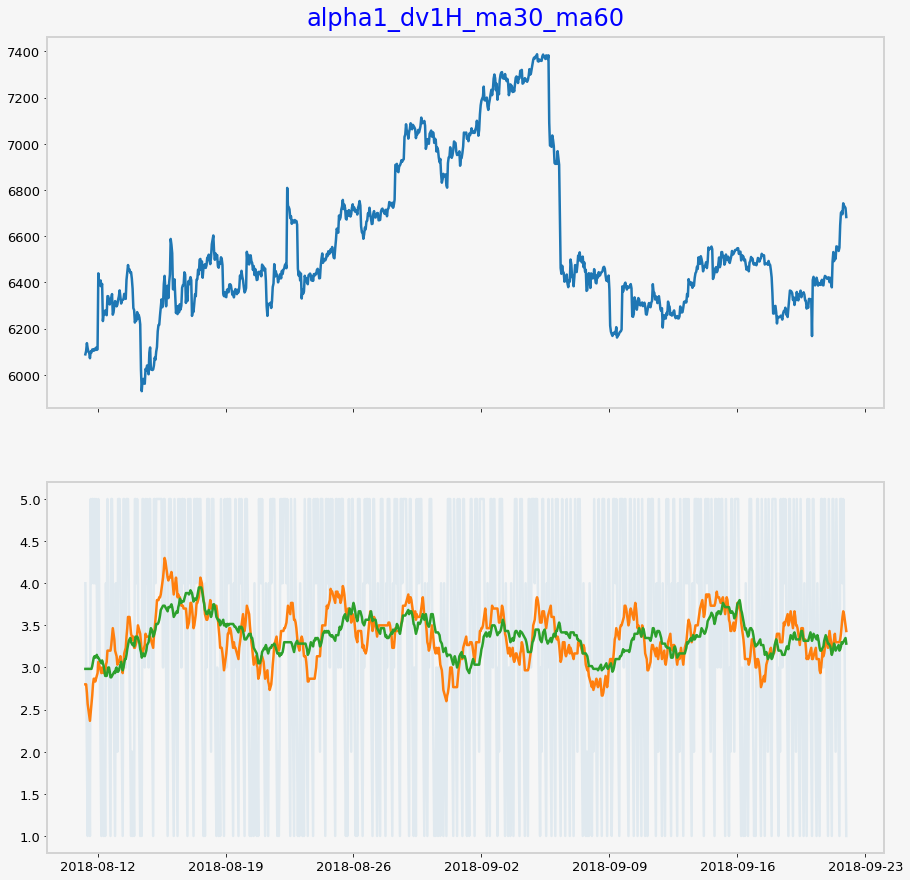

In [23]:
import pandas as pd
#alpha1_dv15M是15分钟线，1H是1小时线，ma30和ma60代表对信号进行均线处理和观察是否与价格存在涨跌关系
for name, alpha in alpha1_dict.items():
    Plot_Mean(globals()[name.split('_')[1]], alpha.iloc[:,0], chart_name=name+'_ma30_ma60',ShortPeriod=30, LongPeriod=60, n=-1000)#橘色短线 绿色长线

In [24]:
import matplotlib.pyplot as plt
import mpl_finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data1H.index, data1H.volume)
    plt.show()

In [208]:
cdl3inside = dv1H.add_formula('cdl3inside', "Ta('CDL3INSIDE', 0, open, high, low, close, volume)", add_data=True)

In [209]:
cdl3insideVolume = dv1H.get_ts('cdl3inside', date_type='datetime')

cdl3insideVolume[cdl3insideVolume['BTCUSDT:binance']==100]

In [213]:
cdl3insideVolumeX = cdl3insideVolume[cdl3insideVolume['BTCUSDT:binance']==100].index
cdl3insideVolumeY = data1H.loc[cdl3insideVolumeX].low-100

from matplotlib.pylab import date2num
data1H['candleTime'] = list(map(date2num, data1H.index))
candle = data1H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

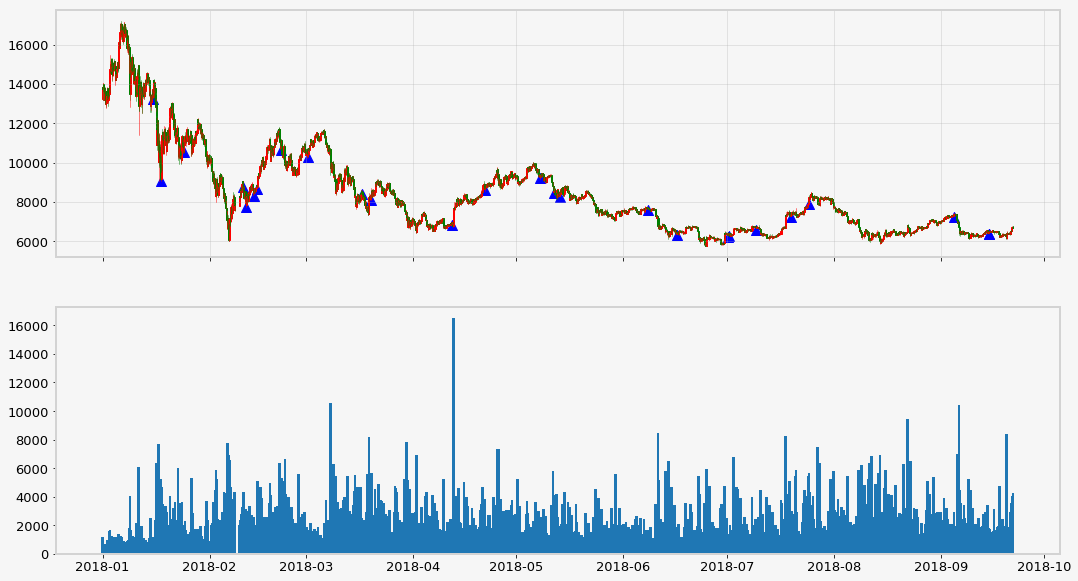

In [214]:
draw_candle(candle, cdl3insideVolumeX, cdl3insideVolumeY)

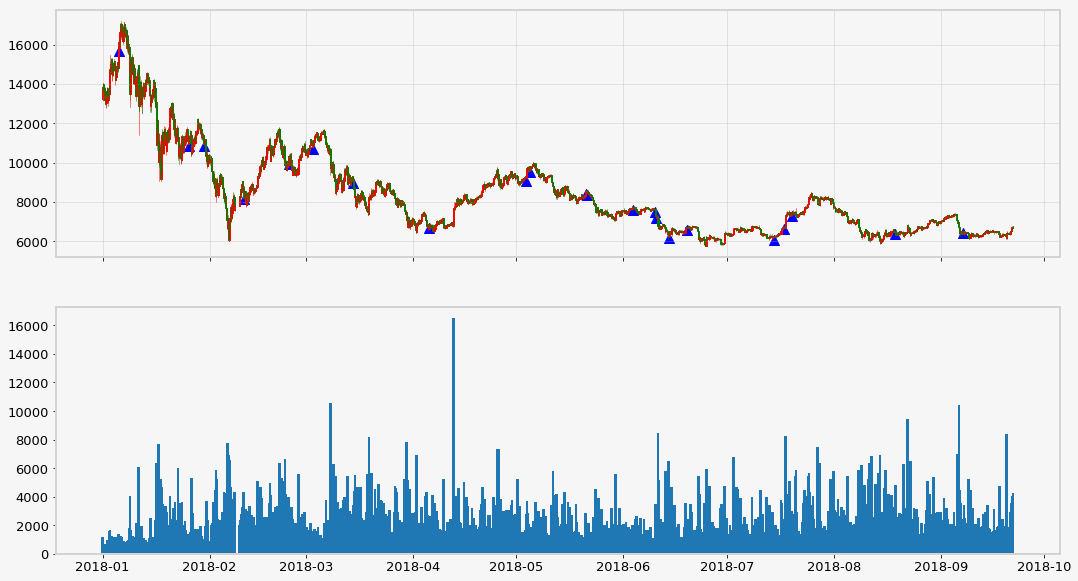

In [215]:
cdl3insideVolumeX = cdl3insideVolume[cdl3insideVolume['BTCUSDT:binance']==-100].index
cdl3insideVolumeY = data1H.loc[cdl3insideVolumeX].low-100
draw_candle(candle, cdl3insideVolumeX, cdl3insideVolumeY)

In [216]:
# 进场信号
long = dv1H.add_formula("long","If(cdl3inside==100,2,0)", add_data=True)
short = dv1H.add_formula("short","If(cdl3inside==-100,-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLong","If(short==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShort","If(long==2,-1,0)", add_data=True)

Field [long] is overwritten.
Field [short] is overwritten.
Field [closeLong] is overwritten.
Field [closeShort] is overwritten.


In [217]:
tdMa.create_event_report(sig_type="long")
tdMa.create_event_report(sig_type="short")
tdMa.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.721 -10.688  -0.320
p-value              0.001   0.000   0.750
mean                 0.059  -0.035  -0.003
std                  0.069   0.020   0.063
info_ratio           0.854  -1.757  -0.042
skewness             1.384   0.022   2.027
kurtosis             0.571  -1.365   4.332
pct5                 0.001  -0.064  -0.058
pct25                0.010  -0.054  -0.047
pct50                0.037  -0.034  -0.018
pct75                0.067  -0.019   0.010
pct95                0.218  -0.005   0.126
occurance           20.000  38.000  58.000
win_ratio              NaN     NaN   0.345
win_mean/loss_mean     NaN     NaN   1.681
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.868  -8.404   0.507
p-value              0.000   0.000   0.614
mean                 0.071  -0.036   0.004
std                  0.056   0.025   0.065
info_ratio           1.280 

In [34]:
def RankPct(df):
#     return df.rank(axis=1, pct=True)
    return df.rank(pct=True)

def add_factor(dv):
    dv.add_formula('alpha002','-1*Correlation(Delta(Log(volume),2),((close-open)/open),6)',add_data=True, register_funcs={'RankPct':RankPct})
    dv.add_formula('alpha003','-1*Correlation(RankPct(open), Rank(volume),10)',add_data=True, register_funcs={'RankPct':RankPct})
    dv.add_formula('alpha004','Ts_Rank(low,9)',add_data=True,register_funcs={'RankPct':RankPct})
    dv.add_formula(field_name='alpha006',formula='-1*Correlation(open,volume,10)',add_data=True)
add_factor(dv1H)

Field [alpha002] is overwritten.
Field [alpha003] is overwritten.
Field [alpha004] is overwritten.
